## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.optimize as opt
import qcodes
from scipy.signal import savgol_filter
print(qcodes.__version__)

# Import QCoDeS specific packages
import qcodes as qc

from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.sqlite.database import initialise_database
from qcodes.dataset.experiment_container import (Experiment,
                                                 load_last_experiment,
                                                 new_experiment)
from qcodes import load_by_id, load_by_run_spec
from qcodes.dataset.plotting import plot_dataset

from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id,flatten_1D_data_for_plot
from qcodes.dataset.experiment_container import load_experiment_by_name, new_experiment

from qcodes.instrument.base import Instrument
from qcodes.dataset.legacy_import import import_dat_file


0.16.0


## DATA Loading

In [2]:
qc.config['core']['db_location'] = r"C:\Users\kjh109\Desktop\My Research in NBI\Dropbox\DATA Files\PPMS Data\DB Files\MQML263_AB_2BD_200825.db"
#qc.config['core']['db_location'] = r"C:\Users\jazzk\Dropbox\DATA Files\PPMS Data\DB Files\MQML263_AB_2BD_200825.db"

([<matplotlib.axes._subplots.AxesSubplot at 0x222847e1518>,
 [None, None, None, None, None])

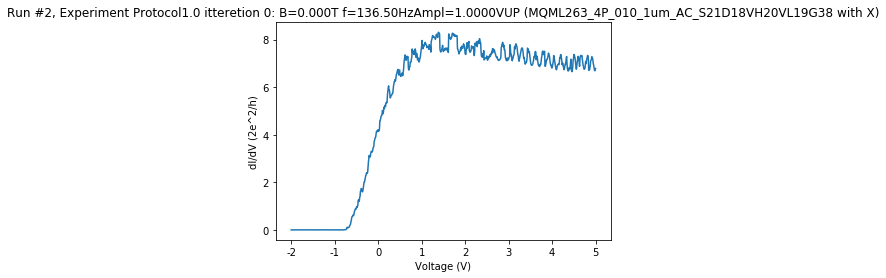

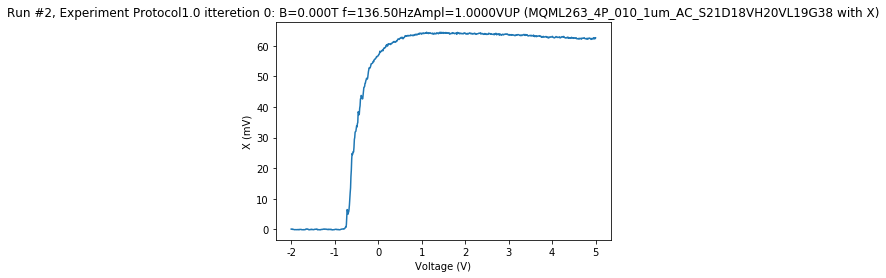

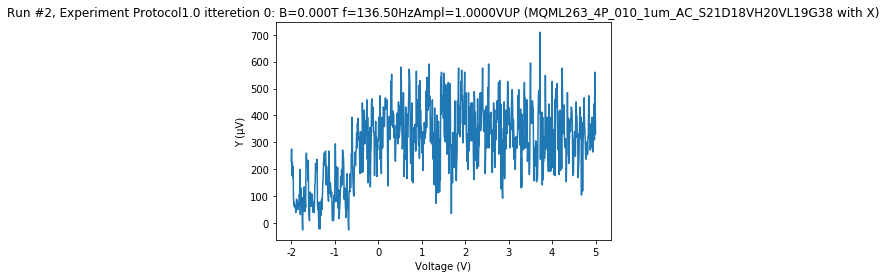

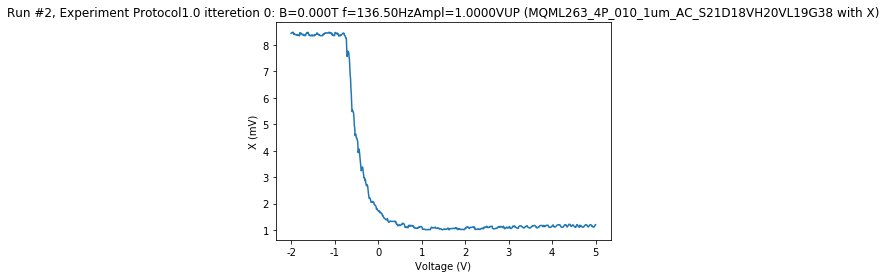

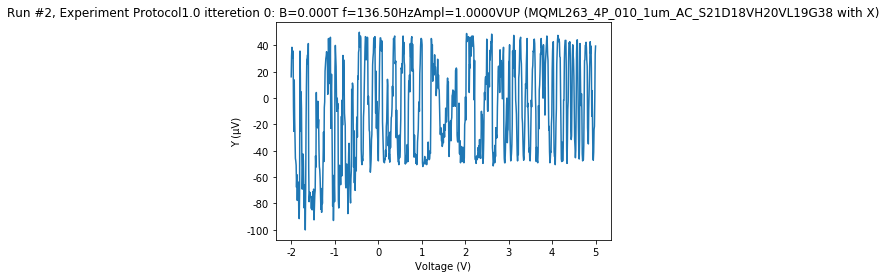

In [3]:
dataset_id = 2
ds = load_by_id(dataset_id)
plot_dataset(ds)

In [68]:
# load data
data_fw = get_data_by_id(2)
data_bw = get_data_by_id(3)

## Import data and timestamp

In [79]:
dividerAC = 1e-04     # the 1V + 1/10000 voltage devider
gain = 1e6             # gain of the current amplifier gain=V/I used 
amplitude = 1e2        # V
Go = 7.7480917310e-5 # Quantum Conductance Unit
#Offset = 1.3683663    # Off set value to fit with DC Conductance
Offset = 1             # Off set value to fit with DC Conductance

# Sweep Forward 
# Gate Voltage in V
print(data_fw[0][0]['name'])
print(data_fw[0][0]['data'])
Vg_fw = np.array(data_fw[0][0]['data'])
#Conductance in 2e2/h
print(data_fw[0][1]['name'])
print(data_fw[0][1]['data'])
Geh_fw = np.array(data_fw[0][1]['data'])
#Calculate conductance in S
Gsi_fw = Geh_fw * Go

# Sweep Backward 
print(data_bw[0][0]['name'])
print(data_bw[0][0]['data'])
Vg_bw = np.array(data_bw[0][0]['data'])
#Conductance in 2e2/h
print(data_bw[0][1]['name'])
print(data_bw[0][1]['data'])
Geh_bw = np.array(data_bw[0][1]['data'])
#Calculate conductance in S
Gsi_bw = Geh_bw * Go


# Sort ascending by voltage 
# Sweep Forward 
idx = np.argsort(Vg_fw)
Vg_fw = np.array(Vg_fw)[idx]
Geh_fw = np.array(Geh_fw)[idx]
Gsi_fw = np.array(Gsi_fw)[idx]
# Sweep Backward
idx = np.argsort(Vg_bw)
Vg_bw = np.array(Vg_bw)[idx]
Geh_bw = np.array(Geh_bw)[idx]
Gsi_bw = np.array(Gsi_bw)[idx]

# Create the Dictionary
log = {}

Keithley_A_smub_volt
[-2.00000e+00 -1.99125e+00 -1.98250e+00 -1.97375e+00 -1.96500e+00
 -1.95625e+00 -1.94750e+00 -1.93875e+00 -1.93000e+00 -1.92125e+00
 -1.91250e+00 -1.90375e+00 -1.89500e+00 -1.88625e+00 -1.87750e+00
 -1.86875e+00 -1.86000e+00 -1.85125e+00 -1.84250e+00 -1.83375e+00
 -1.82500e+00 -1.81625e+00 -1.80750e+00 -1.79875e+00 -1.79000e+00
 -1.78125e+00 -1.77250e+00 -1.76375e+00 -1.75500e+00 -1.74625e+00
 -1.73750e+00 -1.72875e+00 -1.72000e+00 -1.71125e+00 -1.70250e+00
 -1.69375e+00 -1.68500e+00 -1.67625e+00 -1.66750e+00 -1.65875e+00
 -1.65000e+00 -1.64125e+00 -1.63250e+00 -1.62375e+00 -1.61500e+00
 -1.60625e+00 -1.59750e+00 -1.58875e+00 -1.58000e+00 -1.57125e+00
 -1.56250e+00 -1.55375e+00 -1.54500e+00 -1.53625e+00 -1.52750e+00
 -1.51875e+00 -1.51000e+00 -1.50125e+00 -1.49250e+00 -1.48375e+00
 -1.47500e+00 -1.46625e+00 -1.45750e+00 -1.44875e+00 -1.44000e+00
 -1.43125e+00 -1.42250e+00 -1.41375e+00 -1.40500e+00 -1.39625e+00
 -1.38750e+00 -1.37875e+00 -1.37000e+00 -1.36125e+00 -1

  5.00000e+00]
lockin_1_diff_conductance_fpm
[-1.28312878e-03 -9.33397430e-04 -5.25272803e-04 -7.01155652e-04
 -8.21594770e-04  0.00000000e+00  5.86289070e-05  2.35062555e-03
  1.17886693e-03  8.25677131e-04  1.11973220e-03  1.23597661e-03
  1.47089666e-03  1.29453676e-03  5.88727936e-04  1.35430491e-03
  1.17330859e-03  1.05983130e-03  1.76396190e-03  1.17330859e-03
  1.35091526e-03  6.46200279e-04  7.01195595e-04 -1.52046024e-03
  5.88025634e-05  1.23583478e-03  5.89097758e-04  5.30490428e-04
  9.99641882e-04  2.11857567e-03  9.43580533e-04  1.17705333e-03
  1.64562182e-03  2.04839808e-03  0.00000000e+00  9.36731643e-04
  1.28807723e-03  7.61956923e-04  5.84364301e-05 -5.24235616e-04
 -1.86373769e-03 -1.04989345e-03 -9.93417627e-04 -1.75210456e-04
 -1.16998366e-03 -1.76397732e-04  1.11934900e-03  5.87823303e-04
  1.52503947e-03  5.29041281e-04  1.40724805e-03  2.40255890e-03
  4.09285044e-04  0.00000000e+00  5.83636108e-04  1.75667438e-04
  1.58621278e-03  1.76185567e-03  5.27359538e

  6.78777893e+00]
Keithley_A_smub_volt
[ 5.00000e+00  4.99125e+00  4.98250e+00  4.97375e+00  4.96500e+00
  4.95625e+00  4.94750e+00  4.93875e+00  4.93000e+00  4.92125e+00
  4.91250e+00  4.90375e+00  4.89500e+00  4.88625e+00  4.87750e+00
  4.86875e+00  4.86000e+00  4.85125e+00  4.84250e+00  4.83375e+00
  4.82500e+00  4.81625e+00  4.80750e+00  4.79875e+00  4.79000e+00
  4.78125e+00  4.77250e+00  4.76375e+00  4.75500e+00  4.74625e+00
  4.73750e+00  4.72875e+00  4.72000e+00  4.71125e+00  4.70250e+00
  4.69375e+00  4.68500e+00  4.67625e+00  4.66750e+00  4.65875e+00
  4.65000e+00  4.64125e+00  4.63250e+00  4.62375e+00  4.61500e+00
  4.60625e+00  4.59750e+00  4.58875e+00  4.58000e+00  4.57125e+00
  4.56250e+00  4.55375e+00  4.54500e+00  4.53625e+00  4.52750e+00
  4.51875e+00  4.51000e+00  4.50125e+00  4.49250e+00  4.48375e+00
  4.47500e+00  4.46625e+00  4.45750e+00  4.44875e+00  4.44000e+00
  4.43125e+00  4.42250e+00  4.41375e+00  4.40500e+00  4.39625e+00
  4.38750e+00  4.37875e+00  4.37000e+

 -2.00000e+00]
lockin_1_diff_conductance_fpm
[ 7.13061426e+00  6.81125591e+00  6.91743079e+00  7.12228086e+00
  7.15771003e+00  7.28724694e+00  7.16601089e+00  7.08631949e+00
  6.90859171e+00  6.86643998e+00  6.81196874e+00  6.74559616e+00
  6.73684062e+00  6.75813570e+00  6.73351403e+00  6.76974197e+00
  6.75172239e+00  6.78251463e+00  6.80406799e+00  6.81104530e+00
  6.92594194e+00  7.05421920e+00  7.10618333e+00  7.33772937e+00
  7.35214371e+00  7.11770783e+00  7.30848269e+00  7.34776539e+00
  7.42299506e+00  7.36561591e+00  7.29684893e+00  7.34761198e+00
  7.32943793e+00  7.30888089e+00  7.21131625e+00  7.17649860e+00
  7.26206805e+00  7.32746401e+00  7.23246755e+00  7.14232129e+00
  7.04937657e+00  7.03406838e+00  6.98929335e+00  7.00348183e+00
  6.97212796e+00  6.99409417e+00  7.37135877e+00  7.41633276e+00
  7.44041354e+00  7.33002345e+00  7.25458063e+00  7.39077963e+00
  7.50741283e+00  7.49460574e+00  7.50758364e+00  7.47209016e+00
  7.34617217e+00  7.45658772e+00  7.55650545e

  4.70152045e-04]


## Import parameters in the dictionary

In [80]:
log['id']    = 'MQML263'

log['length']      = 1000
log['width']       = 150

# 010 Orientation
#log['capacitance'] = (3.609672617074992e-15)/6.67 #L:300 nm
#log['capacitance'] = (3.609672617074992e-15)/4 #L:500 nm
log['capacitance'] = (3.609672617074992e-15)/2 #L:1 um
#log['capacitance'] = 3.609672617074992e-15 #L:2 um

# 1-10 Orientation
#log['capacitance'] = (4.306251380351123e-15)/6.67 #L:300 nm
#log['capacitance'] = (4.306251380351123e-15)/4 #L:500 nm
#log['capacitance'] = (4.306251380351123e-15)/2 #L:1 um
#log['capacitance'] = 4.306251380351123e-15 #L:2 um

log['location']    = 'mqml' 
log['fridge']      = 'dynacoolppms'
log['lockin']      = 'sr830' # sr830
log['sourcemeter'] = 'keithley2614bsmua'
log['multimeter']  = 'sr830m input' #keysight34465A
log['currentampl'] = 'physicsbaselsp983withlsk389a' # physicsbaselsp983withlsk389a
log['voltageampl'] = 'SR560'


log['voltdivac'] = dividerAC
log['voltdivdc'] = 1/1
log['gain']      = gain


log['timeconstant'] = 0.003   #s
log['sensitivity']  = 1      #V
log['frequency']    = 136.5    #HZ
log['amplitude']    = amplitude  


log['loadingdate']      = '20200825'
log['operator']         = 'Jordan'
log['degastime']        = 10
log['degastempereture'] = 350


log['temperature'] = 1.7
log['field']       = 0
log['biasvoltage'] = 0 * 1e-3
log['gatemax']     = int(max(Vg_bw))
log['gatemin']     = int(min(Vg_bw))
log['points']      = len(Vg_bw)
log['steps']       = float((log['gatemax']-log['gatemin'])/log['points'])
log['duration']    = 120
log['sweeprate']   = (log['gatemax']-log['gatemin'])/log['duration']
log['sweep']       = 'fwbw'


## Pick up points from plot

<IPython.core.display.Javascript object>


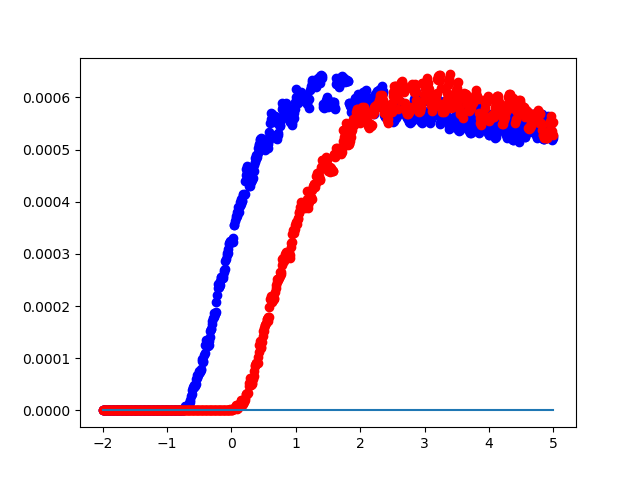

In [81]:
#4 Probes Measurement

%matplotlib notebook

coordlist=[]

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind],ind))
    coordlist.append(points)

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, Gsi_fw,'bo',picker=2)
ax11.plot(Vg_bw, Gsi_bw,'ro',picker=2)
ax11.plot(np.linspace(min(Vg_fw),max(Vg_fw),len(Vg_fw)),np.zeros(len(Vg_fw)))
fig11.canvas.mpl_connect('pick_event', onpick)
plt.show()

<IPython.core.display.Javascript object>


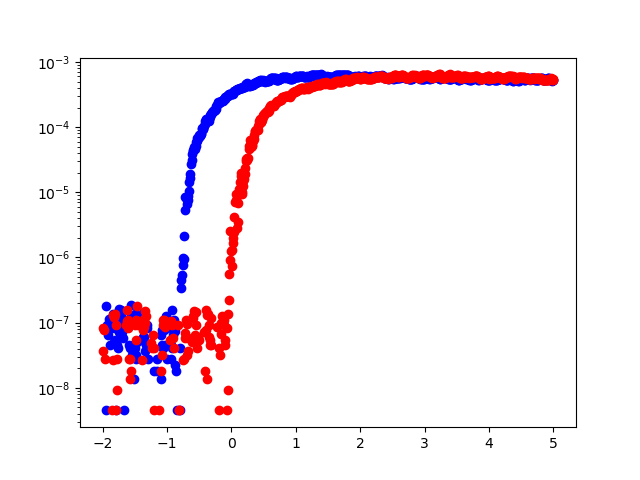

In [13]:
#Log Scale

%matplotlib notebook

coordlist=[]

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind],ind))
    coordlist.append(points)

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, Gsi_fw,'bo',picker=2)
ax11.plot(Vg_bw, Gsi_bw,'ro',picker=2)
ax11.plot(np.linspace(min(Vg_fw),max(Vg_fw),len(Vg_fw)),np.zeros(len(Vg_fw)))
fig11.canvas.mpl_connect('pick_event', onpick)
ax11.set_yscale('log')
plt.show()

In [14]:
coordlist

[((0.59875, 0.0005506848933337373, 297),
  (0.6075, 0.0005582480490947362, 298),
  (0.61625, 0.0005698033571100175, 299),
  (0.625, 0.0005691892792313971, 300),
  (0.63375, 0.0005584168456014756, 301),
  (0.6425, 0.0005524189359963073, 302),
  (0.65125, 0.0005641557399097542, 303)),
 ((0.59875, 0.0005506848933337373, 297),
  (0.6075, 0.0005582480490947362, 298),
  (0.61625, 0.0005698033571100175, 299),
  (0.625, 0.0005691892792313971, 300),
  (0.63375, 0.0005584168456014756, 301),
  (0.6425, 0.0005524189359963073, 302),
  (0.65125, 0.0005641557399097542, 303)),
 ((0.59875, 0.0005506848933337373, 297),
  (0.6075, 0.0005582480490947362, 298),
  (0.61625, 0.0005698033571100175, 299),
  (0.625, 0.0005691892792313971, 300),
  (0.63375, 0.0005584168456014756, 301),
  (0.6425, 0.0005524189359963073, 302),
  (0.65125, 0.0005641557399097542, 303)),
 ((1.9025, 0.0005932908125318388, 446),
  (1.91125, 0.0005856758710790722, 447),
  (1.92, 0.0005984830595556931, 448),
  (1.92875, 0.000593291772840

In [82]:
th_indx_fw    = 145
tail_indx_fw  = 202
satur_indx_fw = 300

th_indx_bw    = 229
tail_indx_bw  = 296
satur_indx_bw = 452


log['vth_fw']    = Vg_fw[th_indx_fw]
log['vth_bw']    = Vg_fw[th_indx_bw]
log['vs_fw']     = Vg_fw[satur_indx_fw]
log['vs_bw']     = Vg_fw[satur_indx_bw]
log['vtail_fw']  = Vg_fw[tail_indx_fw]
log['vtail_bw']  = Vg_fw[tail_indx_bw]
log['gtail_fw']  = Gsi_fw[tail_indx_fw]
log['gtail_bw']  = Gsi_fw[tail_indx_bw]
log['vonoff_fw'] = Vg_fw[satur_indx_fw]-Vg_fw[th_indx_fw]
log['vonoff_bw'] = Vg_fw[satur_indx_bw]-Vg_fw[th_indx_bw]

## Transconductance calculation

<IPython.core.display.Javascript object>


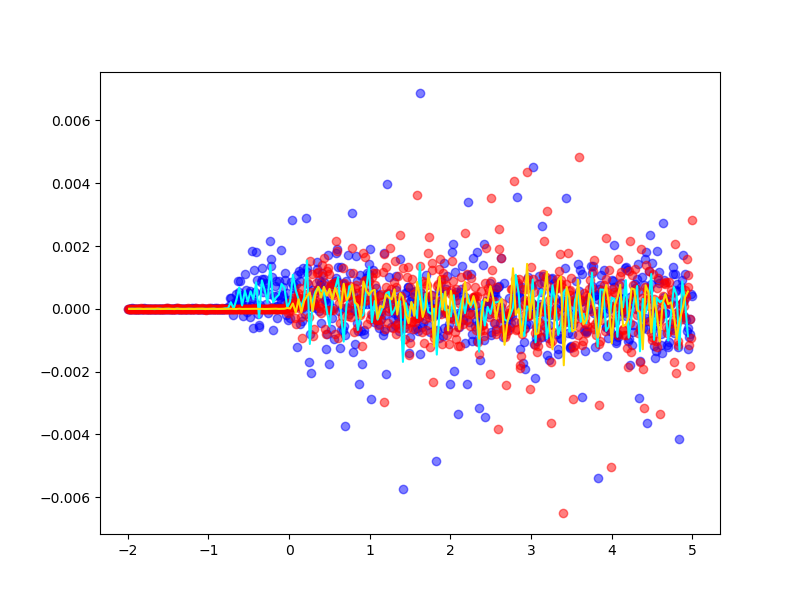

In [85]:
#Method 1

gm_fw  = []
Vtr_fw = []
gm_bw  = []
Vtr_bw = []

Vsd = log['biasvoltage']

# Averaging function
def average(complist, N):
    complist = np.array(complist)
    averlist = []
    counter = 0
    num = 0
    while counter < len(complist)-N:
        for i in range(N):
            num = num + complist[counter+i]
        averlist.append(num/N)
        counter = counter + N
        num = 0
    return averlist, (max(complist)-min(complist))/len(complist)*N, max(averlist)

# Calculating transconductance values
for i in range(len(Gsi_fw)-1):
    DeltaI = Gsi_fw[i+1]-Gsi_fw[i]
    DeltaV = Vg_fw[i+1]-Vg_fw[i]
    gm_fw.append(DeltaI/DeltaV)
    Vtr_fw.append(DeltaV/2+Vg_fw[i])
    
for i in range(len(Gsi_bw)-1):
    gm_bw.append((Gsi_bw[i+1]-Gsi_bw[i])/(Vg_bw[i+1]-Vg_bw[i]))
    Vtr_bw.append((Vg_bw[i+1]-Vg_bw[i])/2+Vg_bw[i])

# Averaging points
dev = 4


# Extracting the average lists
gm_avg_fw  = average(gm_fw,dev)
Vtr_avg_fw = average(Vtr_fw,dev)
gm_avg_bw  = average(gm_bw,dev)
Vtr_avg_bw = average(Vtr_bw,dev)

fig12, ax12 = plt.subplots(figsize=(8, 6))
ax12.plot(Vtr_fw,gm_fw,'bo', alpha = 0.5)
ax12.plot(Vtr_bw,gm_bw,'ro', alpha = 0.5)
ax12.plot(Vtr_avg_fw[0],gm_avg_fw[0],'Aqua')
ax12.plot(Vtr_avg_bw[0],gm_avg_bw[0],'Gold')
plt.show()

# Find the Voltage of peak transconductance
indx_avg_peak_fw = gm_avg_fw[0].index(gm_avg_fw[2])
indx_avg_peak_bw = gm_avg_bw[0].index(gm_avg_bw[2])

Vtr_avg_peak_fw = Vtr_avg_fw[0][indx_avg_peak_fw]
Vtr_avg_peak_bw = Vtr_avg_bw[0][indx_avg_peak_bw]

log['averaging'] = Vtr_avg_fw[1]
log['gm_fw'] = gm_avg_fw[2]
log['gm_bw'] = gm_avg_bw[2]
log['vtr_fw'] = Vtr_avg_peak_fw
log['vtr_bw'] = Vtr_avg_peak_bw


<IPython.core.display.Javascript object>


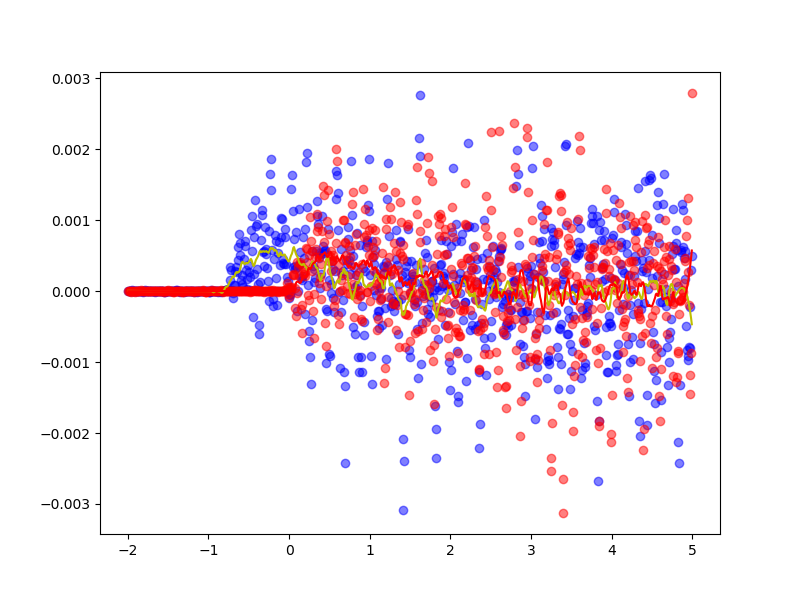

In [73]:
#Method 2

Gsi_fwS = []
Gsi_bwS = [] 
gm_fw  = []
gm_fwS  = []
Vtr_fw = []
gm_bw  = []
gm_bwS  = []
Vtr_bw = []
avg = 3

Gsi_fwS = savgol_filter(Gsi_fw,5,avg)
Gsi_bwS = savgol_filter(Gsi_bw,5,avg)


# Calculating transconductance values
for i in range(len(Gsi_fwS)-1):
    gm_fw.append(((Gsi_fwS[i+1]-Gsi_fwS[i])/(Vg_fw[i+1]-Vg_fw[i])))
    Vtr_fw.append((Vg_fw[i+1]-Vg_fw[i])/2+Vg_fw[i])
    gm_bw.append(((Gsi_bwS[i+1]-Gsi_bwS[i])/(Vg_bw[i+1]-Vg_bw[i])))
    Vtr_bw.append((Vg_bw[i+1]-Vg_bw[i])/2+Vg_bw[i])

gm_fwS = savgol_filter(gm_fw,51,avg)
gm_bwS = savgol_filter(gm_bw,51,avg)

fig12, ax12 = plt.subplots(figsize=(8, 6))
ax12.plot(Vtr_fw,gm_fw,'bo', alpha = 0.5)
ax12.plot(Vtr_bw,gm_bw,'ro', alpha = 0.5)
ax12.plot(Vtr_fw,gm_fwS,'y')
ax12.plot(Vtr_bw,gm_bwS,'r')

plt.show()

log['averaging'] = avg
log['gm_fw'] = max(gm_fw)
log['gm_bw'] = max(gm_bw)
log['vtr_fw'] = Vtr_fw[gm_fw.index(max(gm_fw))]
log['vtr_bw'] = Vtr_bw[gm_bw.index(max(gm_bw))]

## Hysteresis

<IPython.core.display.Javascript object>


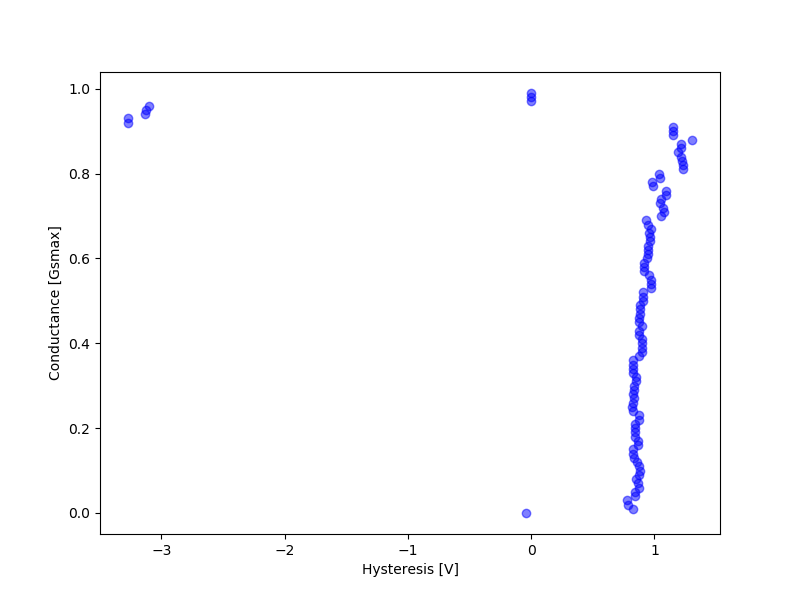

In [86]:
def Ah(V_up,G_up,V_down,G_down): # Voltage in Volts and conductance in siemens
    Go = 7.7480917310e-5
    sur_up=0
    for i in range(len(V_up)-1):
        for j in range(len(G_up)-1):
            sur_up = sur_up + (G_up[i]+G_up[i+1])*(V_up[i+1]-V_up[i])/2
    sur_down=0
    for i in range(len(V_down)-1):
        for j in range(len(G_down)-1):
            sur_down = sur_down + (G_down[i]+G_down[i+1])*(V_down[i+1]-V_down[i])/2
    return sur_up-sur_down

Hyst = Ah(Vg_fw,Gsi_fw,Vg_bw,Gsi_bw) # in VS
log['hysteresis'] = Hyst

Gsmax = abs(Geh_fw[satur_indx_fw]+Geh_bw[satur_indx_bw])/2
log['hysteresis_mid']  = np.interp(Gsmax/2,Geh_bw ,Vg_bw)-np.interp(Gsmax/2,Geh_fw ,Vg_fw)

hys_diff = []
for i in range(100):
    hys_diff.append(np.interp(i*Gsmax/100,Geh_bw ,Vg_bw)-np.interp(i*Gsmax/100,Geh_fw ,Vg_fw))
fig21, ax21 = plt.subplots(figsize=(8, 6))
ax21.plot(hys_diff,np.arange(0,1,0.01),'bo', alpha = 0.5)
plt.ylabel("Conductance [Gsmax]")
plt.xlabel("Hysteresis [V]")
plt.show()
log['DelVhysmax'] = max(hys_diff)
log['Ghysmax'] = Gsmax * hys_diff.index(max(hys_diff))*1e-2

## Mobility fit

<IPython.core.display.Javascript object>


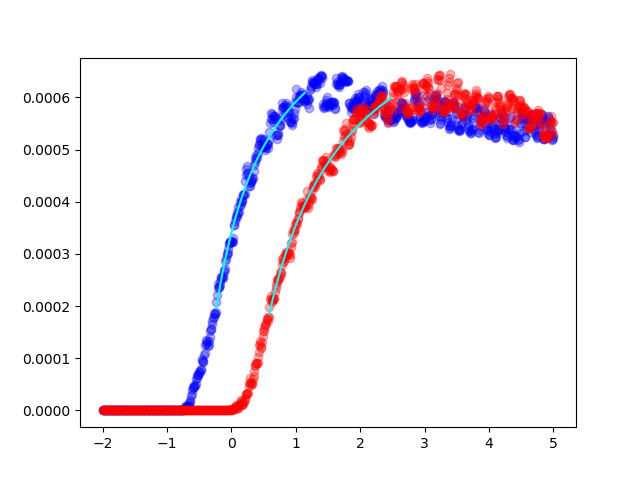

FW: k= 0 +- 633.6828681905376 l= 758.3208405578558 +- 1338.819396495275 m= 0.42564806128324817 +- 0.00019234522790831883
BW: k= 0 +- 455.4540249152019 l= 1135.8098929273347 +- 1861.4148615231093 m= -0.3224383017383269 +- 0.0002339068568639248


In [87]:
# Towards high mobility InSb nanowire devices
# Önder Gül et al 2015 Nanotechnology 26 215202
def gul(x, k, l, m) : # k=Rs; l=L^2/muC; m=Vth;
     return ((k+l/(x+m))**(-1)) 
gul_vect = np.vectorize(gul)


fwmin = 0
fwmax = 60
bwmin = 0
bwmax = 60

# Set the range for the fitting 
Vg_fit_fw = np.array(Vg_fw [(tail_indx_fw+fwmin):(satur_indx_fw+fwmax)])
G_fit_fw  = np.array(Gsi_fw[(tail_indx_fw+fwmin):(satur_indx_fw+fwmax)])
Vg_fit_bw = np.array(Vg_bw [(tail_indx_bw+bwmin):(satur_indx_bw+bwmax)])
G_fit_bw  = np.array(Gsi_bw[(tail_indx_bw+bwmin):(satur_indx_bw+bwmax)])

log['vtail_fw']  = Vg_fw[tail_indx_fw+fwmin]
log['vtail_bw']  = Vg_fw[tail_indx_bw+bwmin]
log['gtail_fw']  = Gsi_fw[tail_indx_fw+fwmin]
log['gtail_bw']  = Gsi_fw[tail_indx_bw+bwmin]

# Fit and plot
fig13 = plt.figure()
ax13  = fig13.add_subplot(111)

ax13.plot(Vg_fw, Gsi_fw,'bo', alpha=0.3, picker=2)
ax13.plot(Vg_bw, Gsi_bw,'ro', alpha=0.3, picker=2)

popt_fw, pcov_fw = opt.curve_fit(gul, Vg_fit_fw, G_fit_fw,p0=[0, 800, 1])
ax13.plot(Vg_fit_fw, gul(Vg_fit_fw, *popt_fw), 'aqua')

popt_bw, pcov_bw = opt.curve_fit(gul, Vg_fit_bw, G_fit_bw,p0=[0, 1200, 1])
ax13.plot(Vg_fit_bw, gul(Vg_fit_bw, *popt_bw), 'aqua')

plt.show()

# Obtain the results
Lo = log['length']*1e-9

Rs_fw = 0
Rs_bw = 0
#Rs_fw = popt_fw[0]
#Rs_bw = popt_bw[0]

LLmuC_fw = popt_fw[1]
LLmuC_bw = popt_bw[1]
Vth_fit_fw = popt_fw[2]
Vth_fit_bw = popt_bw[2]

dRs_fw = pcov_fw[0][0]
dRs_bw = pcov_bw[0][0]
dLLmuC_fw = pcov_fw[1][1]
dLLmuC_bw = pcov_bw[1][1]
dVth_fit_fw = pcov_fw[2][2]
dVth_fit_bw = pcov_bw[2][2]

# Log the results
log['vth_fit_fw'] = Vth_fit_fw
log['vth_fit_bw'] = Vth_fit_bw
log['dvth_fit_fw'] = dVth_fit_fw
log['dvth_fit_bw'] = dVth_fit_bw
log['deltav_fw'] = log['vth_fit_fw']-log['vth_fw']
log['deltav_bw'] = log['vth_fit_bw']-log['vth_bw']
log['muc_fw'] = Lo**2/LLmuC_fw
log['muc_bw'] = Lo**2/LLmuC_bw
log['dmuc_fw'] = (Lo/LLmuC_fw)**2*dLLmuC_fw
log['dmuc_bw'] = (Lo/LLmuC_bw)**2*dLLmuC_bw
log['mu_fw']  = Lo**2/(LLmuC_fw*log['capacitance'])*10000
log['mu_bw']  = Lo**2/(LLmuC_bw*log['capacitance'])*10000
log['dmu_fw'] = Lo**2/(LLmuC_fw**2*log['capacitance'])*dLLmuC_fw*10000
log['dmu_bw'] = Lo**2/(LLmuC_bw**2*log['capacitance'])*dLLmuC_bw*10000
log['rs_fw'] = Rs_fw
log['rs_bw'] = Rs_bw
log['drs_fw'] = dRs_fw
log['drs_bw'] = dRs_bw


print ('FW: k=', Rs_fw, '+-', dRs_fw, 'l=', LLmuC_fw, '+-', dLLmuC_fw, 'm=', Vth_fit_fw, '+-', dVth_fit_fw)
print ('BW: k=', Rs_bw, '+-', dRs_bw, 'l=', LLmuC_bw, '+-', dLLmuC_bw, 'm=', Vth_fit_bw, '+-', dVth_fit_bw)



# If you are satisfied with your fit results, append data to the txt file
# Otherwise re-excecute this cell
# After some tries that you are confident the results look good append data to the txt log file

In [88]:
log

{'id': 'MQML263',
 'length': 1000,
 'width': 150,
 'capacitance': 1.804836308537496e-15,
 'location': 'mqml',
 'fridge': 'dynacoolppms',
 'lockin': 'sr830',
 'sourcemeter': 'keithley2614bsmua',
 'multimeter': 'sr830m input',
 'currentampl': 'physicsbaselsp983withlsk389a',
 'voltageampl': 'SR560',
 'voltdivac': 0.0001,
 'voltdivdc': 1.0,
 'gain': 1000000.0,
 'timeconstant': 0.003,
 'sensitivity': 1,
 'frequency': 136.5,
 'amplitude': 100.0,
 'loadingdate': '20200825',
 'operator': 'Jordan',
 'degastime': 10,
 'degastempereture': 350,
 'temperature': 1.7,
 'field': 0,
 'biasvoltage': 0.0,
 'gatemax': 5,
 'gatemin': -2,
 'points': 801,
 'steps': 0.008739076154806492,
 'duration': 120,
 'sweeprate': 0.058333333333333334,
 'sweep': 'fwbw',
 'vth_fw': -0.73125,
 'vth_bw': 0.00375000000000014,
 'vs_fw': 0.625,
 'vs_bw': 1.955,
 'vtail_fw': -0.2325,
 'vtail_bw': 0.59,
 'gtail_fw': 0.00020793456851671746,
 'gtail_bw': 0.0005339496041296377,
 'vonoff_fw': 1.35625,
 'vonoff_bw': 1.95125,
 'averag

In [89]:
for key in log:
    print(key)

print('============================')
    
for key in log:
    print(log[key])

id
length
width
capacitance
location
fridge
lockin
sourcemeter
multimeter
currentampl
voltageampl
voltdivac
voltdivdc
gain
timeconstant
sensitivity
frequency
amplitude
loadingdate
operator
degastime
degastempereture
temperature
field
biasvoltage
gatemax
gatemin
points
steps
duration
sweeprate
sweep
vth_fw
vth_bw
vs_fw
vs_bw
vtail_fw
vtail_bw
gtail_fw
gtail_bw
vonoff_fw
vonoff_bw
averaging
gm_fw
gm_bw
vtr_fw
vtr_bw
hysteresis
hysteresis_mid
DelVhysmax
Ghysmax
vth_fit_fw
vth_fit_bw
dvth_fit_fw
dvth_fit_bw
deltav_fw
deltav_bw
muc_fw
muc_bw
dmuc_fw
dmuc_bw
mu_fw
mu_bw
dmu_fw
dmu_bw
rs_fw
rs_bw
drs_fw
drs_bw
MQML263
1000
150
1.804836308537496e-15
mqml
dynacoolppms
sr830
keithley2614bsmua
sr830m input
physicsbaselsp983withlsk389a
SR560
0.0001
1.0
1000000.0
0.003
1
136.5
100.0
20200825
Jordan
10
350
1.7
0
0.0
5
-2
801
0.008739076154806492
120
0.058333333333333334
fwbw
-0.73125
0.00375000000000014
0.625
1.955
-0.2325
0.59
0.00020793456851671746
0.0005339496041296377
1.35625
1.95125
0.03495625


## Plotting Quantum Conductance

<IPython.core.display.Javascript object>


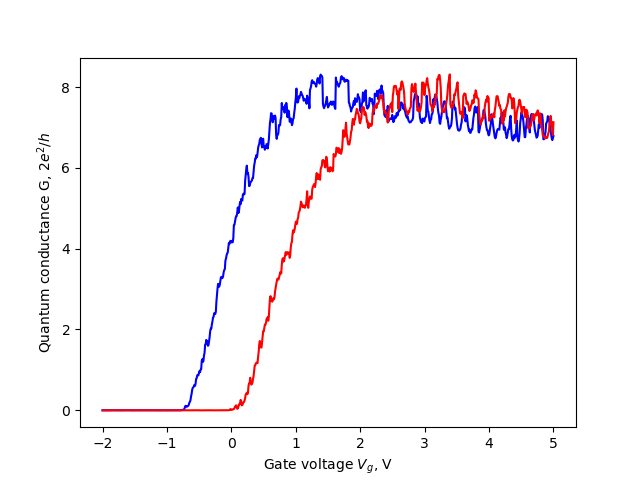

In [44]:
%matplotlib notebook

coordlist=[]

fig11 = plt.figure()
ax11  = fig11.add_subplot(111)

ax11.plot(Vg_fw, Geh_fw,'b-')
ax11.plot(Vg_bw, Geh_bw,'r-')
plt.xlabel(r'Gate voltage $V_g$, V')
plt.ylabel(r'Quantum conductance G, $2e^2/h$')

fig11.canvas.draw()
#plt.savefig ('Q_conductance '+ str(dataset_id) + '.png')
#plt.savefig ('Q_conductance '+ str(dataset_id) + '.svg')

plt.show()